In [ ]:
!pip install nltk
!pip install Sastrawi

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder  #for label encoding
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from numpy.linalg import norm


import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

!pip install tensorflow
!pip install --upgrade tensorflow
from tensorflow.keras.layers import LSTM, MaxPool1D, Dropout, Dense, GlobalMaxPooling1D, Embedding, Activation
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
import tensorflow as tf
#import tensorflow.compat.v1 as tf


from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.layers import concatenate
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Dropout, Lambda
from keras.optimizers import RMSprop
from keras import backend as K

from sklearn.externals import joblib
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from google.colab import files

from numpy import dot
from numpy.linalg import norm
from keras.backend import int_shape
from keras.layers import LSTM
import keras
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau

import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df_train=pd.read_excel("train.xlsx", na_values='?', header=None)
df_valid=pd.read_excel("valid.xlsx", na_values='?', header=None)
df_test=pd.read_excel("test.xlsx", na_values='?', header=None)
df_train=df_train.dropna(axis = 0, how ='any')
df_valid=df_valid.dropna(axis = 0, how ='any')
df_test=df_test.dropna(axis = 0, how ='any')

In [ ]:
df_train.describe

<bound method NDFrame.describe of                                                       0  ...              2
0                                                 title  ...          label
1             bukan cuma stimulus biden tunduk covid 19  ...      Clickbait
2                        5 tanda covid 19 sebar jantung  ...      Clickbait
3     pemprov sulbar tunda vaksinasi covid 19 imbas ...  ...      Clickbait
4             79 huni positif corona panti jakbar tutup  ...      Clickbait
...                                                 ...  ...            ...
6620      ribka pdip kritik vaksin sinovac depan menkes  ...  Non-Clickbait
6621  rekor covid dki wagub dalih data rapel testing...  ...  Non-Clickbait
6622      jokowi rasa efek vaksin sinovac pegal sedikit  ...  Non-Clickbait
6623  cerita guru besar ui sempat gemetar suntik jokowi  ...  Non-Clickbait
6624         isu bakal vaksin pertama bcl hubung istana  ...  Non-Clickbait

[6625 rows x 3 columns]>

In [ ]:
df_valid.describe

<bound method NDFrame.describe of                                                       0  ...              2
0                                                 title  ...          label
1     esq the amazing you gelar virtual tahun ikut 1...  ...      Clickbait
2           hari catat 1 212 kasus aktif covid 19 garut  ...      Clickbait
3     dirut rs ummi positif covid 19 kini stabil pin...  ...      Clickbait
4        vaksin covid 19 sinovac guna januari 2021 alas  ...      Clickbait
...                                                 ...  ...            ...
1884  wni positif covid 19 luar negeri jadi 1 980 or...  ...  Non-Clickbait
1885  cara australia hidup ekonomi lewat voucher bel...  ...  Non-Clickbait
1886  laskar fpi jaga ketat rumah hrs semprot disinf...  ...  Non-Clickbait
1887  jelang pilkada polres sumbawa barat luncur lom...  ...  Non-Clickbait
1888              tiga inovasi desa sesaot lombok barat  ...  Non-Clickbait

[1889 rows x 3 columns]>

In [ ]:
df_test.describe

<bound method NDFrame.describe of                                                      0  ...              2
0                                                title  ...          label
1    cepat tangan covid 19 ganjar optimal satkorwil...  ...      Clickbait
2                    who mungkin peluru perak covid 19  ...      Clickbait
3    kasus positif covid 19 diy 10 persen dominasi ...  ...      Clickbait
4    update 4 agustus kasus suspek covid 19 capai 6...  ...      Clickbait
..                                                 ...  ...            ...
924  penjara sri lanka rusuh akibat lonjak corona 8...  ...  Non-Clickbait
925     469 tugas kpps pilkada padang reaktif covid 19  ...  Non-Clickbait
926  benyamin pilar janji lanjut kerja airin rachmi...  ...  Non-Clickbait
927  kasus covid 19 lonjak ruang icu rs surabaya penuh  ...  Non-Clickbait
928  dinkes dki ungkap wagub riza patria positif co...  ...  Non-Clickbait

[929 rows x 3 columns]>

In [ ]:
def extract_data(df):
    a=df.iloc[1:,0]
    b=df.iloc[1:,1]
    df.iloc[:,2] = df.iloc[:,2].str.replace('Non-Clickbait','1')
    df.iloc[:,2] = df.iloc[:,2].str.replace('Clickbait','0')
    y_actual=df.iloc[1:,2]
    return a,b,y_actual

#def extract_dd(df):
#    a=df.iloc[1:,0]
#    b=df.iloc[1:,1]
#    return a,b
    

a_train,b_train,y_actual=extract_data(df_train)
a_valid,b_valid,y_valid=extract_data(df_valid)
a_test,b_test,y_test=extract_data(df_test)

In [ ]:
print("TRAINING DATA ---->")
print()
print("Heading---->")
print()
print(a_train[:5])
print()
print("Body--->")
print()
print(b_train[:5])
print()
print("Y---->")
print("1 means News & 0 means Clickbait")
print()
print(y_actual[:5])

print()
print("Similar for validation & testing data")

TRAINING DATA ---->

Heading---->

1            bukan cuma stimulus biden tunduk covid 19
2                       5 tanda covid 19 sebar jantung
3    pemprov sulbar tunda vaksinasi covid 19 imbas ...
4            79 huni positif corona panti jakbar tutup
5    studi 5 juta mati global akibat covid hingga m...
Name: 0, dtype: object

Body--->

1    ekonom usaha amerika serikat as nilai kerja ru...
2    covid 19 lebih sekadar sakit serang napas saki...
3    perintah provinsi sulawesi barat lalu dinas se...
4    banyak 79 orang panti yayasan tri asih kebon j...
5    buah tim ahli china ingat dampak global pandem...
Name: 1, dtype: object

Y---->
1 means News & 0 means Clickbait

1    0
2    0
3    0
4    0
5    0
Name: 2, dtype: object

Similar for validation & testing data


In [ ]:
def pre_process_data(a,b):
    final_lines=[]
    final_headings=[]


    for line in range(1,int(len(a)+1)):
      #print(a[line])
      #print(type(a[line]))
      #print("*********")
      a[line]=(a[line]).lower()     #Converting all sentences to lower case 
      #for word in a[line].split():
        #if word in contractions:
            #a[line]=a[line].replace(word, contractions[word.lower()])  #Writing Abbreviations in full form
      tokens = word_tokenize(a[line].lower()) 
      words = [word for word in tokens if word.isalpha()]    #Removing punctuations
      final_word = [w for w in words if not w in stop_words]     #Removing Stop words 
      final_words = [lemmatizer.lemmatize(w) for w in final_word]     #Lemmatizing words
      ans=""
      for x in final_words:
        ans= ans+ " "+x
      final_lines.append(ans.lstrip())
      b[line]=(b[line]).lower()     #Converting all sentences to lower case 
      #for word in b[line].split():
        #if word in contractions:
            #b[line]=b[line].replace(word, contractions[word.lower()])  #Writing Abbreviations in full form
      tokens = word_tokenize(b[line].lower()) 
      words = [word for word in tokens if word.isalpha()]    #Removing punctuations
      final_head = [w for w in words if not w in stop_words]     #Removing Stop words 
      final_heads = [lemmatizer.lemmatize(w) for w in final_head]     #Lemmatizing words
      ans=""
      for x in final_heads:
        ans= ans+ " "+x
      final_headings.append(ans.lstrip())
    return final_headings,final_lines

lemmatizer = WordNetLemmatizer()

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory 
factory = StopWordRemoverFactory()
stop_words = stopwords.words('indonesian')

In [ ]:
final_headings,final_lines = pre_process_data(a_train,b_train)
final_headings_valid,final_body_valid = pre_process_data(a_valid,b_valid)
final_headings_test,final_body_test = pre_process_data(a_test,b_test)

In [ ]:
print(len(a_train),len(b_train),len(y_actual))
print(len(a_valid),len(b_valid),len(y_valid))
print(len(a_test),len(b_test),len(y_test))

6624 6624 6624
1888 1888 1888
928 928 928


In [ ]:
print(len(final_headings))
print(len(final_lines))
print(len(final_headings_valid))
print(len(final_body_valid))
print(len(final_headings_test))
print(len(final_body_test))

6624
6624
1888
1888
928
928


In [ ]:
def vectorisation(final_lines):    
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(final_lines)
    final_word_vector=[]
    i=0
    while (i<X.shape[0] and i+9000<X.shape[0]):
        final_word_vector.extend(X[i:i+9000].toarray())
        i+=9000

    final_word_vector.extend(X[i:].toarray())
    return final_word_vector

In [ ]:
final_headings.extend(final_lines)
final_headings.extend(final_headings_valid)
final_headings.extend(final_body_valid)
final_headings.extend(final_headings_test)
final_headings.extend(final_body_test)

In [ ]:
del stop_words
del lemmatizer
del final_lines

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(final_headings)]

In [ ]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
model = Doc2Vec(documents, vector_size=50, window=2, min_count=1, workers=4)

In [ ]:
print(model.docvecs[10])
x=[]
for i in range(len(model.docvecs)):
  x.append(model.docvecs[i])

[ 0.01554479 -0.00792295  0.02542356 -0.06221076  0.07646318  0.01198541
 -0.0241564  -0.02648892 -0.03752439 -0.03327915  0.03382878  0.07014285
  0.00066067 -0.07528106  0.04214641 -0.05162156 -0.01180726 -0.03290888
  0.0182628  -0.03977869 -0.00663714 -0.00822117  0.02371878  0.05253945
  0.03333301 -0.00262306  0.00588943 -0.0180829   0.02551205 -0.0470522
 -0.09363107 -0.02108713  0.03507025  0.06792542 -0.07771406 -0.01697722
 -0.01606034 -0.02600048 -0.09114225  0.06232045  0.00639591  0.02602203
  0.01676893  0.10098096  0.00729183 -0.07469147  0.02402766  0.06158323
  0.07770678  0.08577326]


In [ ]:
x=np.array(x)
print(x.shape)

(18880, 50)


In [ ]:
print(model.docvecs[0])
print(x[0])

[-0.09529217 -0.00075534 -0.02700222 -0.15674594  0.00520947  0.01423256
 -0.00672578  0.05994945  0.0197593   0.00897633  0.0693763   0.12178436
  0.05766056 -0.05714665  0.09957863  0.03829085  0.05488772  0.05515466
  0.13692576 -0.08367208 -0.13937779 -0.10875186  0.14188224  0.03040995
  0.031439    0.05197882  0.01034777 -0.04194864  0.0611117   0.08563585
 -0.06460106  0.05421239 -0.06761117  0.00889392 -0.07747637 -0.04728026
 -0.15216084 -0.04138092 -0.04614702  0.00939571 -0.07043336 -0.04870025
  0.04316922  0.03238359  0.11644275 -0.08059517 -0.07649343 -0.04851727
  0.05241079  0.01706511]
[-0.09529217 -0.00075534 -0.02700222 -0.15674594  0.00520947  0.01423256
 -0.00672578  0.05994945  0.0197593   0.00897633  0.0693763   0.12178436
  0.05766056 -0.05714665  0.09957863  0.03829085  0.05488772  0.05515466
  0.13692576 -0.08367208 -0.13937779 -0.10875186  0.14188224  0.03040995
  0.031439    0.05197882  0.01034777 -0.04194864  0.0611117   0.08563585
 -0.06460106  0.05421239 

In [ ]:
print(type(x))

<class 'numpy.ndarray'>


In [ ]:
final_heading_vector=np.array(x[0:6624])

In [ ]:
a=6624*2
final_body_vector=np.array(x[6624:a])

In [ ]:
validation_heading_vector=np.array(x[a:a+1888])

In [ ]:
validation_body_vector=np.array(x[a+1888:a+3776])

In [ ]:
test_heading_vector=np.array(x[a+3776:a+3776+928])

In [ ]:
test_body_vector=np.array(x[a+3776+928:])

In [ ]:
y_actual=y_actual.astype(float)
y_valid=y_valid.astype(float)
y_test=y_test.astype(float)

In [ ]:
y_actual=np.array(y_actual)
y_valid=np.array(y_valid)
y_test=np.array(y_test)

In [ ]:
print(final_heading_vector.shape)
print(final_body_vector.shape)
print(y_actual.shape)

print("----------------------")

print(validation_heading_vector.shape)
print(validation_body_vector.shape)
print(y_valid.shape)

print("----------------------")

print(test_heading_vector.shape)
print(test_body_vector.shape)
print(y_test.shape)
print("----------------------")

(6624, 50)
(6624, 50)
(6624,)
----------------------
(1888, 50)
(1888, 50)
(1888,)
----------------------
(928, 50)
(928, 50)
(928,)
----------------------


In [ ]:
def create_base_network(input_shape):
    input = Input(shape=(input_shape[0],input_shape[1]))
    
    x =Bidirectional(LSTM(32,activation='relu',return_sequences=True))(input)
    x =LSTM(32,activation='sigmoid')(x)
    x = Dropout(0.1)(x)
    x = Lambda(lambda  x: K.l2_normalize(x,axis=1))(x)
    x = Lambda(lambda  x: K.l2_normalize(x,axis=1))(x)
    
    return Model(input, x)


def contrastive_loss(y_true, y_pred):
    
    margin = 1.0
    sqaure_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(margin - y_pred, 0))
    return float(K.mean(float(y_true) * float(sqaure_pred) + (1.0 - float(y_true)) * float(margin_square)))


def cosine_sim(vects):
  a,b=vects
  ans=[]
  s=int_shape(a)[1]
  for i in range(s):
    temp1=a[i]
    temp2=b[i]
    normalize_a = tf.nn.l2_normalize(temp1,0)        
    normalize_b = tf.nn.l2_normalize(temp2,0)
    cos_similarity=tf.reduce_sum(tf.multiply(normalize_a,normalize_b))
    ans.append(cos_similarity)
  return tf.convert_to_tensor(ans)

In [ ]:
#conveting to 3d data for model
fh=final_heading_vector.reshape((final_heading_vector.shape[0],final_heading_vector.shape[1],1))
fb=final_body_vector.reshape((final_body_vector.shape[0],final_body_vector.shape[1],1))
fh=fh[:6624]
fb=fb[:6624]

f1=validation_heading_vector.reshape((validation_heading_vector.shape[0],validation_heading_vector.shape[1],1))
f2=validation_body_vector.reshape((validation_body_vector.shape[0],validation_body_vector.shape[1],1))

y_actual=y_actual.reshape((y_actual.shape[0],1))
y_actual=y_actual[:6624]
y_valid=y_valid.reshape((y_valid.shape[0],1))
y_test=y_test.reshape((y_test.shape[0],1))

In [ ]:

# network definition
input_shape = final_heading_vector.shape[1]
ipt_shape=(final_heading_vector.shape[1],1)
base_network = create_base_network(ipt_shape)

input_a = Input(shape=ipt_shape)
input_b = Input(shape=ipt_shape)

# because we re-use the same instance `base_network`,
# the weights of the network
# will be shared across the two branches

processed_a = base_network(input_a)
processed_b = base_network(input_b)

distance = Lambda(cosine_sim)([processed_a, processed_b])

model = Model([input_a, input_b], distance)

opt = keras.optimizers.Adam()

earlystop = EarlyStopping(patience=5)
 
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, min_lr=0.001)

callbacks = [earlystop, learning_rate_reduction]

model.compile(loss=contrastive_loss, optimizer=opt)

In [ ]:
history = model.fit([fh, fb], y_actual,
          batch_size=32,
          epochs=100,callbacks=callbacks,
          validation_data=([f1,f2], y_valid))

Epoch 1/100
207/207 [==============================] - 35s 95ms/step - loss: 0.6878 - val_loss: 0.8437
Epoch 2/100
207/207 [==============================] - 16s 76ms/step - loss: 0.6524 - val_loss: 0.1565
Epoch 3/100
207/207 [==============================] - 16s 75ms/step - loss: 0.1479 - val_loss: 0.1469
Epoch 4/100
207/207 [==============================] - 16s 75ms/step - loss: 0.1294 - val_loss: 0.1380
Epoch 5/100
207/207 [==============================] - 16s 75ms/step - loss: 0.1349 - val_loss: 0.1370
Epoch 6/100
207/207 [==============================] - 16s 76ms/step - loss: 0.1606 - val_loss: 0.1347
Epoch 7/100
207/207 [==============================] - 16s 75ms/step - loss: 0.1314 - val_loss: 0.1388
Epoch 8/100
207/207 [==============================] - 16s 75ms/step - loss: 0.1260 - val_loss: 0.1382
Epoch 9/100
207/207 [==============================] - 16s 75ms/step - loss: 0.1318 - val_loss: 0.1369
Epoch 10/100
207/207 [==============================] - 16s 75ms/step - l

In [ ]:
from keras.models import load_model
model.save('model_lstm_clickbait.h5')

In [ ]:
model.summary()

Model: "model_53"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_80 (InputLayer)           [(None, 50, 1)]      0                                            
__________________________________________________________________________________________________
input_81 (InputLayer)           [(None, 50, 1)]      0                                            
__________________________________________________________________________________________________
model_52 (Functional)           (None, 32)           21120       input_80[0][0]                   
                                                                 input_81[0][0]                   
__________________________________________________________________________________________________
lambda_80 (Lambda)              (32,)                0           model_52[0][0]            

PREDIKSI TRAIN

In [ ]:
y_pred = model.predict([f1,f2])
y_valid=y_valid

In [ ]:
for i in range(len(y_pred)):
  if(y_pred[i]<0.5):
    y_pred[i]=1
  else:
    y_pred[i]=0

In [ ]:
print("SHAPE OF Y PREDICTED : ")
print(y_pred.shape)
print()
print("SOME Y PREDICTED VALUES:")
print(y_pred[:15])

SHAPE OF Y PREDICTED : 
(1888,)

SOME Y PREDICTED VALUES:
[1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.]


In [ ]:
acc=accuracy_score(y_valid, y_pred)
print("ACCURACY SCORE FOR VALIDATION DATA = ",acc*100)

ACCURACY SCORE FOR VALIDATION DATA =  80.82627118644068


In [ ]:
print("CLASSIFICATION REPORT FOR VALIDATION DATA : ")
print()
print(classification_report(y_valid,y_pred))

CLASSIFICATION REPORT FOR VALIDATION DATA : 

              precision    recall  f1-score   support

         0.0       0.24      0.11      0.15       295
         1.0       0.85      0.94      0.89      1593

    accuracy                           0.81      1888
   macro avg       0.55      0.52      0.52      1888
weighted avg       0.75      0.81      0.78      1888



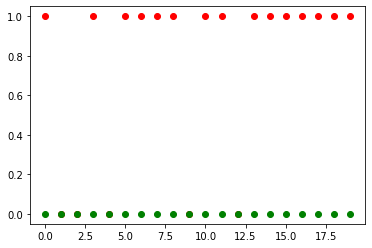

In [ ]:
plt.scatter(range(20),y_pred[:20],c="r")
plt.scatter(range(20),y_valid[:20],c="g")
plt.show()

In [ ]:
train_predict = pd.DataFrame({'predict': y_pred})

In [ ]:
train_predict.insert(1, 'predict_label','')
for i in train_predict.index:
  if train_predict['predict'][i] == 1.0 :
    train_predict['predict_label'][i] = 'Non-Clickbait'
  else :
    train_predict['predict_label'][i] = 'Clickbait'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train_predict.to_excel("train_predict.xlsx")

In [ ]:
dup = train_predict.pivot_table(index = ['predict_label'], aggfunc ='size') 
print(dup)

predict_label
Clickbait         129
Non-Clickbait    1759
dtype: int64


TESTING

In [ ]:
ft1=test_heading_vector.reshape((test_heading_vector.shape[0],test_heading_vector.shape[1],1))
ft2=test_body_vector.reshape((test_body_vector.shape[0],test_body_vector.shape[1],1))

In [ ]:
y_pred_test = model.predict([ft1,ft2])
y_test=y_test

In [ ]:
for i in range(len(y_pred_test)):
  if(y_pred_test[i]<0.5):
    y_pred_test[i]=1
  else:
    y_pred_test[i]=0

In [ ]:
print("SHAPE OF Y PREDICTED : ")
print(y_pred_test.shape)
print()
print("Y PREDICTED VALUES FOR TESTING DATA (1 MEANS NEWS, 0 MEANS CLICKBAIT):")
print()
print(y_pred_test)

SHAPE OF Y PREDICTED : 
(928,)

Y PREDICTED VALUES FOR TESTING DATA (1 MEANS NEWS, 0 MEANS CLICKBAIT):

[1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 1. 1

In [ ]:
test_acc=accuracy_score(y_test, y_pred_test)
print("ACCURACY SCORE FOR TESTING DATA = ",test_acc*100)

ACCURACY SCORE FOR TESTING DATA =  81.78879310344827


In [ ]:
print("CLASSIFICATION REPORT FOR TESTING DATA : ")
print()
print(classification_report(y_test,y_pred_test))

CLASSIFICATION REPORT FOR TESTING DATA : 

              precision    recall  f1-score   support

         0.0       0.41      0.38      0.39       146
         1.0       0.89      0.90      0.89       782

    accuracy                           0.82       928
   macro avg       0.65      0.64      0.64       928
weighted avg       0.81      0.82      0.81       928



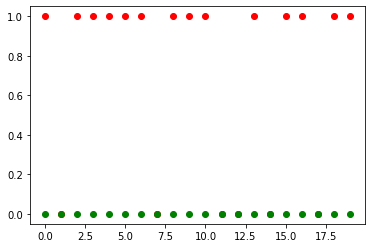

In [ ]:
plt.scatter(range(20),y_pred_test[:20],c="r")
plt.scatter(range(20),y_test[:20],c="g")
plt.show()

In [ ]:
test_predict = pd.DataFrame({'predict': y_pred_test})

In [ ]:
test_predict.head()

predict
0      1.0
1      0.0
2      1.0
3      1.0
4      1.0

In [ ]:
test_predict.insert(1, 'predict_label','')
for i in test_predict.index:
  if test_predict['predict'][i] == 1.0 :
    test_predict['predict_label'][i] = 'Non-Clickbait'
  else :
    test_predict['predict_label'][i] = 'Clickbait'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
test_predict.to_excel("test_predict.xlsx")

In [ ]:
test_predict.describe()

predict
count  928.000000
mean     0.856681
std      0.350586
min      0.000000
25%      1.000000
50%      1.000000
75%      1.000000
max      1.000000

In [ ]:
dups = test_predict.pivot_table(index = ['predict_label'], aggfunc ='size') 
print(dups)

predict_label
Clickbait        133
Non-Clickbait    795
dtype: int64


Evaluasi

In [ ]:
#import pandas as pd
#hasil=pd.read_excel("hasil_test(1).xlsx")

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
#hasil.head()

In [ ]:
#confusion_matrix = pd.crosstab(y_test,y_pred_test, rownames=['Actual'], colnames=['Predicted'])
#print (confusion_matrix)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_test)

array([[ 55,  91],
       [ 78, 704]])

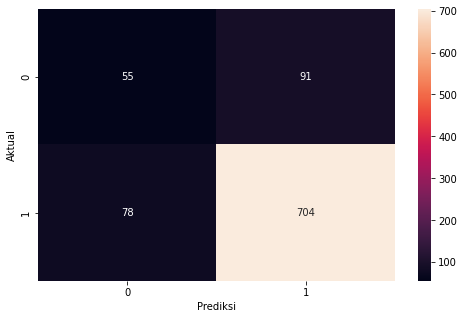

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test,y_pred_test), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.41      0.38      0.39       146
         1.0       0.89      0.90      0.89       782

    accuracy                           0.82       928
   macro avg       0.65      0.64      0.64       928
weighted avg       0.81      0.82      0.81       928

